This is where we will implement and code everything....

In [34]:
import numpy as np
import random as random
%matplotlib inline
import matplotlib.pyplot as plt


def uniform_B_field_test():
    """Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step



    F=q*E + q*v*np.cross(B) 
    MEANS F = whatever + q* [v_x,v_y,v_z] x [B_x,B_y,B_z]
    
        for now we assume no E"""

    #velocity perameters to be entered
    
    
    T= np.linspace(0,100,101) 
       
    
    x_0 = 1 
    y_0 = 0
    z_0 = 0
    
    (x_0**2+y_0**2+z_0**2) == 1
    
    
    
    
    v_x = 1000
    v_y = 0
    v_z = 0
    
    x_current = x_0
    y_current = y_0
    z_current = z_0
    
        
    x_list=[]
    y_list=[]
    z_list=[]
    
    
    
    for i in range(T):        #for ease since v is m/s??
        x_list.append(x_current)
        y_list.append(y_current)
        z_list.append(z_current)
        
        x_current = v_x+x_current 
        y_current = v_y+y_current 
        z_current = v_z+z_current 
        

    

    q=-1 #e units

    
    #v_T=q*r*B/m #always is mag of t
    
    #(v_x**2+v_y**2)**(1/2)  ==  v_T 
    
    
    #r=m*v/(B*q)
    
 
    v_vector = [v_x,v_y,v_z]
    
    
    
    B=[0,-1,0]   #value * amp
    
    
    
    F_B=q*np.cross(v_vector,B)
    
    #make B-field
    #F_B_x = q*v_x*B[1,]
    #F_B_y = q*v_y*B
    #F_B_z = q*v_z*B
    

    
    print (F_B)

    
    return (F_B)

uniform_B_field_test()






"""Vary angle the particle is shot into: Do it along normal to B_field(perpendicular), at a small angle away from normal both postive and negative"""
    

TypeError: only integer arrays with one element can be converted to an index

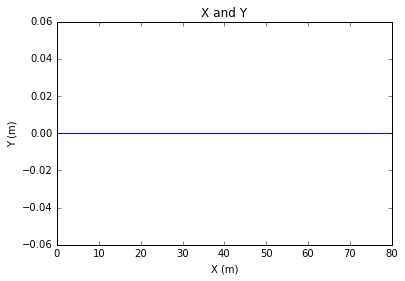

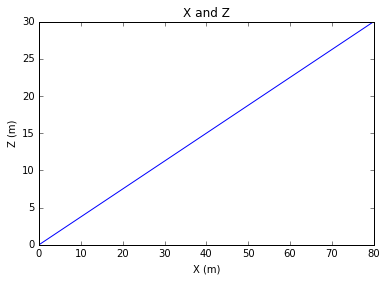

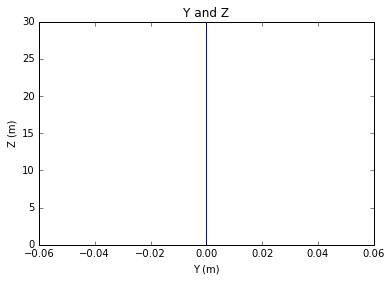

In [20]:
import numpy as np
import random as random
%matplotlib inline
import matplotlib.pyplot as plt


def just_moving_along():#a test in movement
    #initial posiional arguments
    x_0=0
    y_0=0
    z_0=0
    
    #velocity argument
    v_x=8
    v_y=0
    v_z=3
    
    
    
    time=10
    time_step_num=1000
    time_steps= time/time_step_num
    
   
    x_current = x_0
    y_current = y_0
    z_current = z_0
    
        
    x_list=[]
    y_list=[]
    z_list=[]
    
    
    
    for i in range(time_step_num):      
        x_list.append(x_current)
        y_list.append(y_current)
        z_list.append(z_current)
        
        x_current = v_x*time_steps+x_current 
        y_current = v_y*time_steps+y_current 
        z_current = v_z*time_steps+z_current 
        
    plt.plot(x_list, y_list)
    plt.title("X and Y")
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.show()    

    
    plt.plot(x_list, z_list)
    plt.title("X and Z")
    plt.xlabel("X (m)")
    plt.ylabel("Z (m)")
    plt.show()    

    
    plt.plot(y_list, z_list)
    plt.title("Y and Z")
    plt.xlabel("Y (m)")
    plt.ylabel("Z (m)")
    plt.show()    
    
    return
        
just_moving_along()
    
    

Enter value of v_x 1
Enter value of v_y 1
Enter value of v_z 2
Enter charge value -12


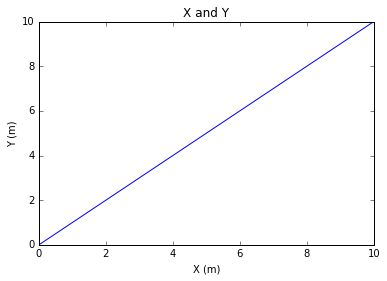

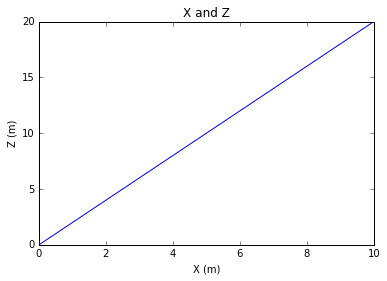

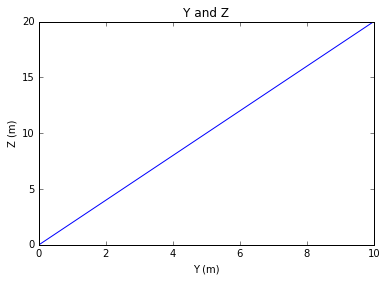

([1.0, 1.0, 2.0], [0, 1, 0], array([ 24.,  -0., -12.]), -12)

In [4]:
import numpy as np
import random as random
%matplotlib inline
import matplotlib.pyplot as plt


def uniform_B_field():
    v_x = float(input("Enter value of v_x "  ))
    v_y = float(input("Enter value of v_y "  ))
    v_z = float(input("Enter value of v_z "  ))
               
    v_vector = [v_x,v_y,v_z]           
    
    
    
    q = int(input("Enter charge value "  ))
    
    
    #entered argument
    
        
    x_0=0.0
    y_0=0.0
    z_0=0.0
    
    
    
    time=10.0
    time_step_num=1000.0
    time_steps= time/time_step_num
    
   
    x_current = x_0
    y_current = y_0
    z_current = z_0
    
        
    x_list=[]
    y_list=[]
    z_list=[]
    
        
    B=[0.0,1.0,0.0]*1.0 #float because constant     
    
    F_B=q*np.cross(v_vector,B)
    
    [F_x,F_y,F_z]=F_B
    
    
    #OR
    B_x=0.0
    B_y=1.0
    B_z=0.0
    
    F_B_x=q*v_x*B_x
    F_B_y=q*v_y*B_y
    F_B_z=q*v_z*B_z


    
    
    
    
    
    for i in range(time_step_num):      
        x_list.append(x_current)
        y_list.append(y_current)
        z_list.append(z_current)
        
        x_current = v_x*time_steps+x_current 
        y_current = v_y*time_steps+y_current 
        z_current = v_z*time_steps+z_current 
        
    plt.plot(x_list, y_list)
    plt.title("X and Y")
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.show()    

    
    plt.plot(x_list, z_list)
    plt.title("X and Z")
    plt.xlabel("X (m)")
    plt.ylabel("Z (m)")
    plt.show()    

    
    plt.plot(y_list, z_list)
    plt.title("Y and Z")
    plt.xlabel("Y (m)")
    plt.ylabel("Z (m)")
    plt.show()    
    
    
    
    
    B=[0.0,1.0,0.0]*1.0 #float because constant 
    
    F_B=q*np.cross(v_vector,B)
    
    

    
    return v_vector, B, F_B, q

uniform_B_field()

#need K energy and Total E of system


In [ ]:

"""

NONUNIFORM
Will simulate a single particle in a uniform B-field
A simplistic case meant to be a proof of concept
Will be initally plotted in 2D and will later be expanded to 3D 
so we can better see more complicated corkscrew shapes


possibly make a single code to simulate particle charges?
just make the equation of the B-field varry (constant = 1, or varrying =sin or cos, 
random = break total field into bits and mult by random number)

do we put boundaries to bounce on? or do we let it shoot out of the testing area?



PARAMETERS
charge (positive or negative and what value, have it enterable in units of e)
length of field/length of testing area
number of steps to calculate (remember its in 3D so you may have to use less to save time)
inital velocity x
inital velocity y
inital velocity z
time for the expeiment to take place (maybe have a cutoff once particle exits field 
or a ways after so we can see slightly more long term effects (simple (if paramter = 1.5 field length- end )))
    I am more in favor of this cutoff method to be our primary method of ending the code. Though we could add 
    **kwargs statement so if we only want to see a  tiny amount of time, we can (and then add statement that 
    if time= anything use that)


Output




Location(and plotted with connecting line)
Array of KE values for each step




    F=q*E + q*v*np.cross(B) 
    MEANS F = whatever + q* [v_x,v_y,v_z] x [B_x,B_y,B_z]
    
        for now we assume no E"""
def nonuniform_B_field():
    v_x = float(input("Enter value of v_x "  ))
    v_y = float(input("Enter value of v_y "  ))
    v_z = float(input("Enter value of v_z "  ))
               
    v_vector = [v_x,v_y,v_z]           
    
    
    
    q = int(input("Enter charge value "  ))
    
    
    #entered argument
    
        
    x_0=0
    y_0=0
    z_0=0
    
    
    
    time=10
    time_step_num=1000
    time_steps= time/time_step_num
    
   
    x_current = x_0
    y_current = y_0
    z_current = z_0
    
        
    x_list=[]
    y_list=[]
    z_list=[]
    
        
    B=[0,1,0]*1 #Push  
    
    F_B=q*np.cross(v_vector,B)
    
    
    
    for i in range(time_step_num):      
        x_list.append(x_current)
        y_list.append(y_current)
        z_list.append(z_current)
        
        x_current = v_x*time_steps+x_current 
        y_current = v_y*time_steps+y_current 
        z_current = v_z*time_steps+z_current 
        
    plt.plot(x_list, y_list)
    plt.title("X and Y")
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.show()    

    
    plt.plot(x_list, z_list)
    plt.title("X and Z")
    plt.xlabel("X (m)")
    plt.ylabel("Z (m)")
    plt.show()    

    
    plt.plot(y_list, z_list)
    plt.title("Y and Z")
    plt.xlabel("Y (m)")
    plt.ylabel("Z (m)")
    plt.show()    
    
    
    
    
    B=[0,1,0]*1 #change this is jsut copy of uniform
    
    
    F_B=q*np.cross(v_vector,B)
    
    #print (v_vector,"    ", F_B)

    
    return v_vector, B, F_B, q

uniform_B_field()




In [ ]:
"""Ring/Taurus broken into 8 pieces. Set point 1 and all ofthe pices in respect to 1
Simple case is shoot ring perpendicular to B and add other piece places to see ring turn"""